In [1]:
#https://towardsdatascience.com/turn-photos-into-cartoons-using-python-bb1a9f578a7e
#add the important libuary
import cv2
import numpy as np
# required if you use Google Colab
from google.colab.patches import cv2_imshow
from google.colab import files

In [2]:
#Load Image
def read_file(filename):
  img = cv2.imread(filename)
  cv2_imshow(img)
  return img

In [3]:
#Create Edge Mask
def edge_mask(img, line_size, blur_value):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
  return edges

Saving Capture.PNG to Capture.PNG


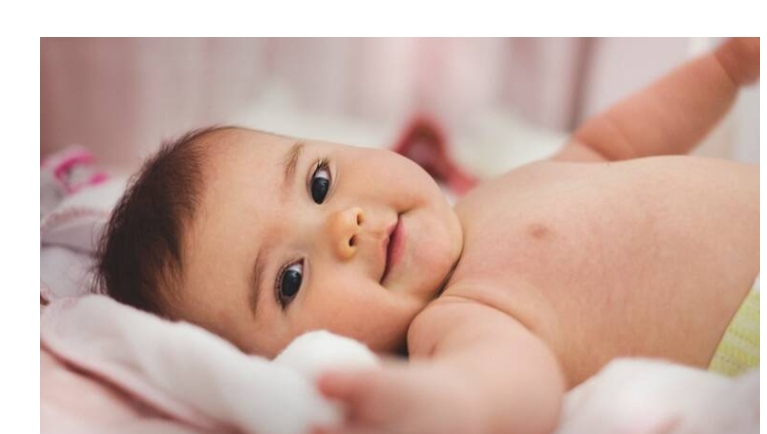

In [4]:
#upload the image
uploaded = files.upload()
filename = next(iter(uploaded))
img = read_file(filename)

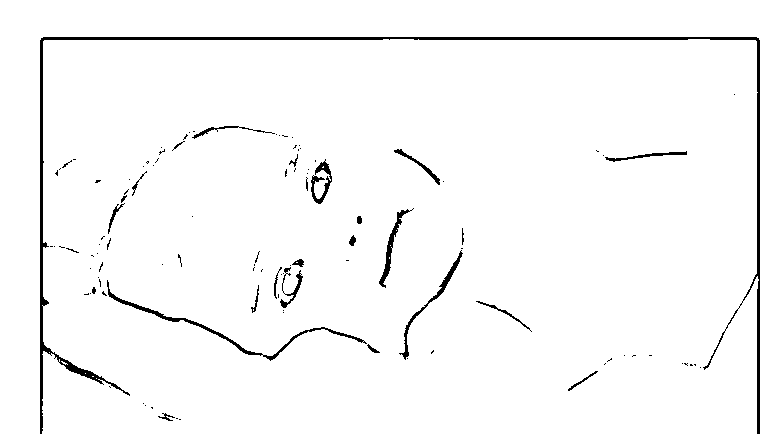

In [5]:
#determine the dimention of the cartoon photo
line_size = 7
blur_value = 7
edges = edge_mask(img, line_size, blur_value)
cv2_imshow(edges)

In [6]:
#Reduce the Color Palette
def color_quantization(img, k):
# Transform the image
  data = np.float32(img).reshape((-1, 3))

# Determine criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

# Implementing K-Means
  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

In [7]:
#etermine the number of colors that we want to apply to the image.
total_color = 9
img = color_quantization(img, total_color)

In [8]:
#Bilateral Filter
blurred = cv2.bilateralFilter(img, d=7, sigmaColor=200,sigmaSpace=200)

In [9]:
#Combine Edge Mask with the Colored Image
cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)

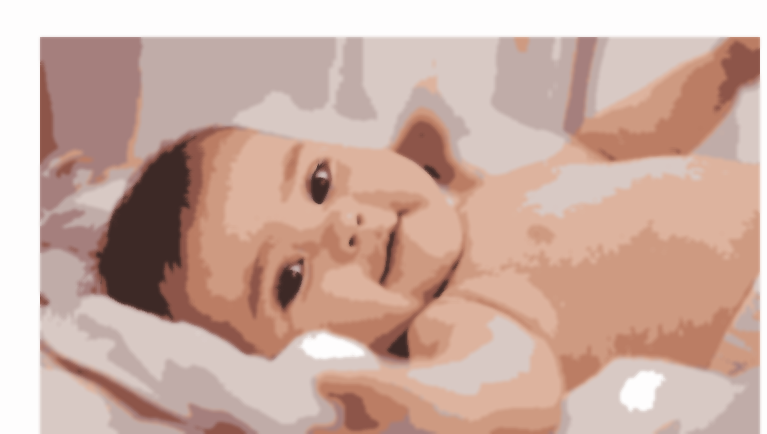

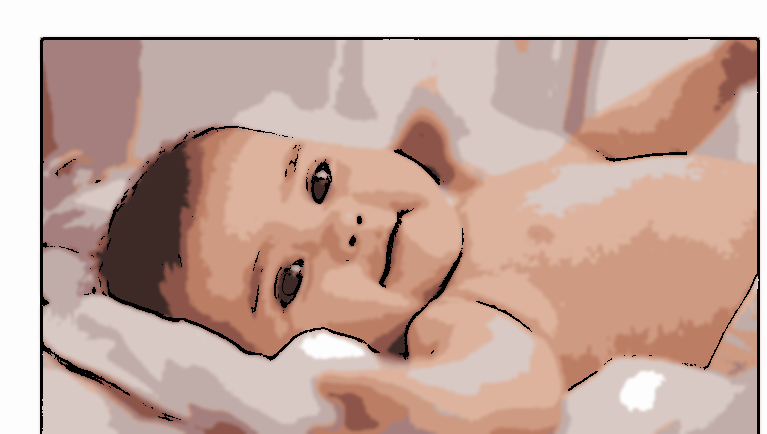

In [10]:
cv2_imshow(blurred)
cv2_imshow(cartoon)